In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.animation as an
import cv2 as cv
import ipywidgets as iw

%matplotlib widget

ValueError: Key backend: 'module://ipympl.backend_nbagg' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline']

In [2]:
def KS ():

    fig = pl.figure()

    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    return fig

In [3]:
def Show (img, map = 'gray'):
    KS()
    return pl.imshow (img, cmap = map)

In [4]:
def Test ():

    d = 10
    m = 10 * d
    n = 10 * d

    u = np.zeros ((m, n))
    m2 = m // 2
    n2 = n // 2

    u [m2 - d : m2 + d, n2 - d : n2 + d] = 1
    u [-1, :] = 1

    return u

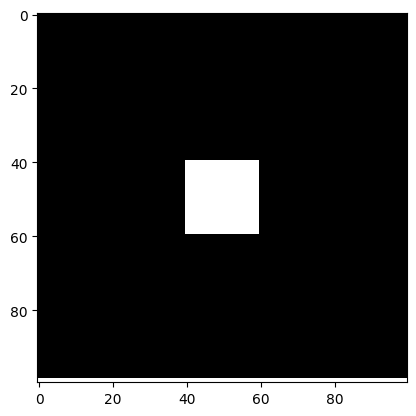

In [5]:
Show (Test())

In [6]:
def Laplace (u):

    c = u [1 : -1, 1 : -1]
    w = u [  : -2, 1 : -1]
    e = u [2 :   , 1 : -1]
    s = u [1 : -1,   : -2]
    n = u [1 : -1, 2 :   ]

    return w + e + s + n - 4 * c

In [7]:
def Show2 (img1, img2, map = 'gray'):
    
    KS()
    pl.subplot (1, 2, 1); res1 = pl.imshow (img1, cmap = map)
    pl.subplot (1, 2, 2); res2 = pl.imshow (img2, cmap = map)

    return res1, res2

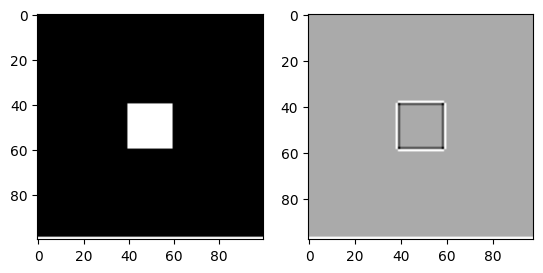

In [8]:
def LaplaceTest (u):

    du = Laplace (u)
    Show2 (u, du)

LaplaceTest (Test())

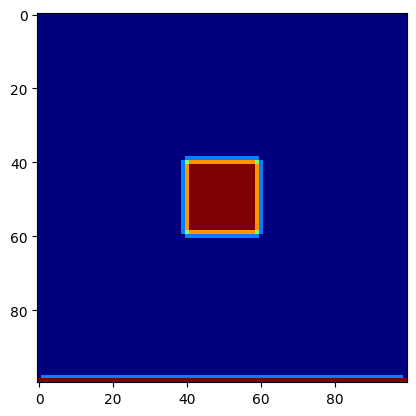

In [9]:
c = 0.25

fig = KS()
u = Test()
img = pl.imshow (u, cmap = 'jet', vmin = 0, vmax = 1)

def Step (i):
    du = Laplace (u)
    u [1 : -1, 1 : -1] += c * du
    img.set_data (u)

anim = an.FuncAnimation (fig, Step, cache_frame_data = False, interval = 0)

In [10]:
anim.pause()
del anim, fig, img, c, u

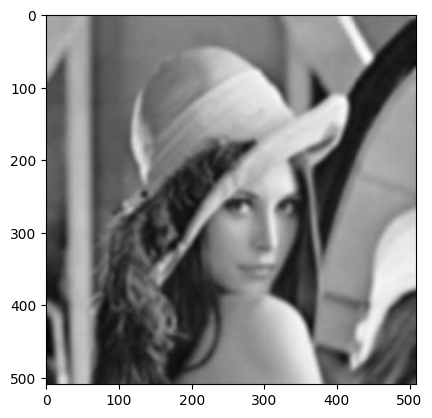

In [11]:
def TestImage ():

    rgb = cv.imread ('Images/lenna-blurred.jpg')
    gray = cv.cvtColor (rgb, cv.COLOR_BGR2GRAY) / 255.0

    return gray

Show (TestImage())

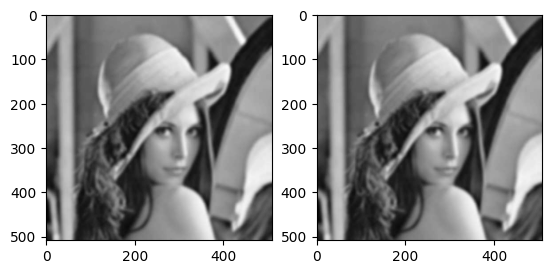

interactive(children=(FloatSlider(value=0.0, description='c', max=10.0, min=-10.0, step=0.01), Output()), _dom…

In [12]:
def Sharpening ():

    u0 = TestImage()
    u1 = np.copy (u0)
    dummy, img = Show2 (u0, u1)

    def Callback (c):
    
        du = Laplace (u0)
        u = u0 [1 : -1, 1: -1] - c * du
        img.set_data (u)

    sl = iw.FloatSlider (min = -10, max = 10, step = 0.01, value = 0)
    iw.interact (Callback, c = sl)

Sharpening()